In [1]:
#IMPORTANDO BIBLIOTECAS
import setuptools
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
#EXTRAINDO BASE DE DADOS
base_ativos = pd.read_excel('Base_ativos.xlsx')

In [4]:
#FUNÇÃO PARA EXCLUIR OS ULTIMOS DOIS DIGITOS DOS CÓDIGOS DOS FUNDOS
def excluir_5_dig(COTA):
    return str(COTA)[:6]

#FUNÇÃO PARA DEFINIR SE O FUNDOS É UM PEER DO GARE OU NÃO
def peer(x):
    if x in top10_peers:
        return 'PEER'
    else:
        return 'NAO PEER'

#LISTAS
gare11 = ['GARE11.SA']

top10_peers = ['GARE11.SA', 'KNRI11.SA', 'ALZR11.SA', 'TRXF11.SA', 'VIUR11.SA', 'BTLG11.SA', 'BRCO11.SA', 'RBRP11.SA', 'HGRU11.SA', 'GGRC11.SA']

fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']

fundos_ifix= ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA',
                'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
                'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
                'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'HGRU11.SA',
                'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
                'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA', 'GAME11.SA',
                'RZTR11.SA', 'BTRA11.SA', 'SNEL11.SA', 'HTMX11.SA', 'TGAR11.SA', 'JSRE11.SA',
                'MFII11.SA', 'BTHF11.SA', 'RBRF11.SA', 'JSAF11.SA', 'KFOF11.SA', 'RZAK11.SA',
                'BCIA11.SA', 'KISU11.SA', 'XPSF11.SA', 'BPFF11.SA', 'HGFF11.SA', 'SNFF11.SA',
                'RBFF11.SA', 'RVBI11.SA', 'BBFO11.SA', 'KNIP11.SA', 'KNCR11.SA', 'MXRF11.SA', 
                'IRDM11.SA', 'KNHY11.SA', 'CPTS11.SA', 'RECR11.SA', 'HCTR11.SA', 'CLIN11.SA',
                'KNHF11.SA', 'MCCI11.SA', 'HGCR11.SA', 'KNUQ11.SA', 'VGHF11.SA', 'URPR11.SA',
                'VRTA11.SA', 'VGIR11.SA', 'RBRR11.SA', 'VCJR11.SA', 'DEVA11.SA', 'RBRY11.SA', 
                'KNSC11.SA', 'MCRE11.SA', 'VGIP11.SA', 'CVBI11.SA', 'BTCI11.SA', 'XPCI11.SA',  
                'HABT11.SA', 'BCRI11.SA', 'CACR11.SA', 'AFHI11.SA', 'BARI11.SA', 'SNCI11.SA', 
                'KCRE11.SA', 'PORD11.SA', 'MANA11.SA', 'VSLH11.SA', 'OUJP11.SA', 'ARRI11.SA',
                'WHGR11.SA', 'RBRX11.SA', 'HSAF11.SA', 'KIVO11.SA', 'SPXS11.SA',  'CYCR11.SA']


#FUNÇÃO PARA REALIZAR A VARIAÇÃO DO GARE11 E DO IFIX TIJOLO
data_inicial = '2025-02-03'
data_final = '2025-02-08'

#EXTRAINDO AS COTAÇÕES DOS FUNDOS DE TIJOLO, BASEADO NAS DATAS DAS VARIAVEIS ACIMA
tab_cotacoes = yf.download(fundos, data_inicial, data_final)['Close']
tab_cotacoes= tab_cotacoes.round(2)
tab_cotacoes.index = pd.to_datetime(tab_cotacoes.index)

#EXTRAINDO AS COTAÇÕES DE TODOS OS FUNDOS DO IFIX, BASEADO NAS DATAS DAS VARIAVEIS ACIMA
tab_cotacoes_ifix = yf.download(fundos_ifix,data_inicial,data_final)['Close']
tab_cotacoes_ifix = tab_cotacoes_ifix.round(2)
tab_cotacoes_ifix.index = pd.to_datetime(tab_cotacoes_ifix.index)


#EXTRAINDO AS COTAÇÕES DO GARE11, BASEADO NAS DATAS DAS VARIAVEIS ACIMA
tab_gare11 = yf.download(gare11, data_inicial, data_final)['Close']
tab_gare11 = tab_gare11.round(2)
tab_gare11.index = pd.to_datetime(tab_gare11.index)

#CALCULANDO A VARIAÇÃO DO PERIODO BASEADO NA PRIMEIRA E NA ULTIMA DATA DO PERIODO
var_mensal = (tab_cotacoes.loc['2025-02-07'] - tab_cotacoes.loc['2025-02-03'])/tab_cotacoes.loc['2025-02-03']
var_gare11 = (tab_gare11.loc['2025-02-07'] - tab_gare11.loc['2025-02-03'])/tab_gare11.loc['2025-02-03']
var_mensal_ifix = ((tab_cotacoes_ifix.loc['2025-02-07'] - tab_cotacoes_ifix.loc['2025-02-03'])/tab_cotacoes_ifix.loc['2025-02-03'])

#TRANSFORMANDO OS RESULTADOS DA OPERAÇÃO ACIMA EM DATAFRAMES - FIIs TIJOLO
tab_mensal = pd.DataFrame(var_mensal)
tab_mensal = tab_mensal.rename(columns={0:'VARIAÇÃO'})

#TRANSFORMANDO OS RESULTADOS DA OPERAÇÃO ACIMA EM DATAFRAMES - GARE11
df_gare11 = pd.DataFrame(var_gare11)
df_gare11 = df_gare11.rename(columns = {0:'VARIAÇÃO'})

#TRANSFORMANDO OS RESULTADOS DA OPERAÇÃO ACIMA EM DATAFRAMES - FIIs IFIX
tab_mensal_ifix = pd.DataFrame(var_mensal_ifix)
tab_mensal_ifix = tab_mensal_ifix.rename(columns={0:'VARIAÇÃO'})

#PEGANDO AS MÉDIAS DOS DATAFRAMES DE GARE E DO IFIX TIJOLO
media_tijolo = (tab_mensal['VARIAÇÃO'].mean())
definitivo_gare11 = (df_gare11['VARIAÇÃO'].mean())

#CONSOLIDANDO OS DOIS DATAFRAMES EM UMA ÚNICA TABELA
consolidado = {'VAR_TIJOLO':[media_tijolo], 'VAR_GARE11':[definitivo_gare11]}
df_tijoloxgare11 = pd.DataFrame(consolidado)
df_tijoloxgare11

[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  115 of 115 completed
[*********************100%***********************]  1 of 1 completed


,VAR_TIJOLO,VAR_GARE11
0,-0.000925,0.014103


In [5]:
#PEGANDO O PREÇO DE TODOS OS FUNDOS DO IFIX E OS TRANSFORMANDO EM UM DATAFRAME
data_inicial_teste = '2025-02-03'
data_final_teste = '2025-02-08'

teste = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA']
#DATAFRAME DE PREÇOS DOS ATIVOS
teste_ativo = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Close']
#DATAFRAME DE VOLUMES DOS ATIVOS
ativo_volume = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Volume']
teste_ativo

[*********************100%***********************]  115 of 115 completed
[*********************100%***********************]  115 of 115 completed


Ticker,AFHI11.SA,AIEC11.SA,AJFI11.SA,ALZR11.SA,ARRI11.SA,BARI11.SA,BBFO11.SA,BCIA11.SA,BCRI11.SA,BLMG11.SA,...,VIUR11.SA,VRTA11.SA,VSLH11.SA,WHGR11.SA,XPCI11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA,ZAVI11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-03,88.500000,44.830002,6.96,96.550003,7.38,62.270000,55.520000,76.900002,57.900002,29.219999,...,5.37,76.349998,2.93,8.06,70.680000,65.900002,90.000000,97.449997,5.52,90.629997
2025-02-04,89.809998,45.310001,6.91,97.349998,7.20,62.799999,56.220001,76.809998,57.230000,28.730000,...,5.32,75.279999,2.91,8.03,71.199997,65.459999,91.820000,96.500000,5.53,84.139999
2025-02-05,88.010002,44.000000,6.91,96.330002,7.25,61.700001,56.220001,76.290001,56.799999,28.730000,...,5.22,74.660004,2.92,7.70,72.000000,65.300003,89.940002,97.949997,5.46,83.309998
2025-02-06,88.000000,45.619999,6.84,96.199997,7.40,60.910000,56.200001,76.800003,57.000000,28.639999,...,5.18,74.180000,2.93,7.99,71.279999,64.769997,89.639999,97.980003,5.43,86.050003
2025-02-07,87.750000,46.000000,6.85,96.250000,7.46,60.709999,55.810001,76.989998,57.400002,28.700001,...,5.24,73.809998,2.93,8.14,71.410004,65.180000,91.000000,97.940002,5.50,88.839996


In [7]:
#TRANSPONDO O DATAFRAME FEITO ACIMA E ALTERANDO O NOMME DA COLUNA "TICKER"
ativo_transposto = teste_ativo.T
ativo_transposto = ativo_transposto.round(2)
ativo_transposto = ativo_transposto.rename(columns = {'Ticker':'TICKER'})
ativo_transposto = pd.DataFrame(ativo_transposto)
volume_transposto = ativo_volume.T
volume_transposto = volume_transposto.round(2)
volume_transposto = volume_transposto.rename(columns = {'Ticker':'TICKER'})
volume_transposto = pd.DataFrame(volume_transposto)

base_ativos = base_ativos.rename(columns={'TICKER':'Ticker'})

In [ ]:
tab_mensal_ifix

In [8]:
ativos_merge = pd.merge(base_ativos, ativo_transposto[['2025-2-06', '2025-2-07']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_PREÇO'))

ativos_merge.rename(columns={pd.Timestamp('2025-2-07 00:00:00'): 'Preço1', pd.Timestamp('2025-2-06 00:00:00'): 'Preço2' }, inplace=True)
ativos_merge['VM'] = ativos_merge['COTAS']*ativos_merge['Preço1']
ativos_merge['P/VP'] = ativos_merge['VM']/ativos_merge['VP MM']
ativos_merge['P/VP'] = ativos_merge['P/VP'].round(2)
ativos_merge['VARIAÇÃO_DIARIA'] = ((ativos_merge['Preço1'] - ativos_merge['Preço2'])/ativos_merge['Preço2'])*100
ativos_merge['VARIAÇÃO_DIARIA'] = ativos_merge['VARIAÇÃO_DIARIA'].round(2)
ativos_merge = ativos_merge.drop(columns=['SUP', 'COTISTAS'])
ativos_merge['Peer_GARE'] = ativos_merge['Ticker'].apply(peer)

ativos_merge = pd.merge(ativos_merge, volume_transposto[['2025-2-07', '2025-2-06']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_Vol'))

ativos_merge.rename(columns={pd.Timestamp('2025-2-07 00:00:00'): 'Volume1', pd.Timestamp('2025-2-06 00:00:00'): 'Volume2' }, inplace=True)
ativos_merge = ativos_merge.drop(columns=['Volume2'])
ativos_merge= ativos_merge.rename(columns={'Volume1':'Quantidade'})
ativos_merge['Volume'] = ativos_merge['Preço1']*ativos_merge['Quantidade']
ativos_merge['%PL'] = ativos_merge['Volume']/ativos_merge['VP MM']

ativos_merge = pd.merge(ativos_merge, tab_mensal_ifix[['VARIAÇÃO']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_PERIODO'))

ativos_merge

,Ticker,TIPO,VP MM,COTAS,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,DIV Y1,DIV Y3,DIV Y6,DIV Y12,Preço2,Preço1,VM,P/VP,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL,VARIAÇÃO
0,KNRI11.SA,HIB Tijolo,4.553042e+09,28204047,7.592850e+06,1.442641e+08,1.0000,3.000,6.000000,11.000000,130.69,131.51,3.709114e+09,0.81,0.63,PEER,22951.0,3018286.01,0.000663,0.015051
1,TVRI11.SA,HIB Tijolo,1.614022e+09,15919690,1.540689e+06,2.927309e+07,1.0300,2.990,5.930000,10.790000,81.89,82.00,1.305415e+09,0.81,0.13,NAO PEER,0.0,0.00,0.000000,-0.017022
2,ALZR11.SA,HIB Tijolo,1.279322e+09,12226625,2.312998e+06,4.394697e+07,0.8055,2.386,4.621209,8.366883,96.20,96.25,1.176813e+09,0.92,0.05,PEER,8843.0,851138.75,0.000665,-0.003107
3,GARE11.SA,XXXX,1.350740e+09,147458223,6.658875e+06,1.265186e+08,0.0830,0.267,0.536000,0.971000,7.92,7.91,1.166395e+09,0.86,-0.13,PEER,614820.0,4863226.20,0.003600,0.014103
4,RBRP11.SA,HIB Tijolo,9.339984e+08,12179186,1.658621e+06,3.151379e+07,0.4100,1.490,3.090000,5.980000,42.58,41.70,5.078721e+08,0.54,-2.07,PEER,57493.0,2397458.10,0.002567,-0.086528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,1.884556e+08,20189040,4.815625e+05,9.149687e+06,0.1000,0.300,0.601000,1.086000,7.60,7.73,1.560613e+08,0.83,1.71,NAO PEER,39214.0,303124.22,0.001608,-0.022756
113,ARRI11.SA,Recebivel,1.726284e+08,20138980,5.812750e+05,1.104422e+07,0.0900,0.270,0.550000,1.060000,7.40,7.46,1.502368e+08,0.87,0.81,NAO PEER,24514.0,182874.44,0.001059,0.010840
114,CYCR11.SA,Recebivel,3.428976e+08,36549445,7.738895e+05,1.470390e+07,0.1000,0.290,0.560000,1.130000,7.74,7.77,2.839892e+08,0.83,0.39,NAO PEER,49965.0,388228.05,0.001132,0.009091
115,CLIN11.SA,Recebivel,4.192289e+08,4346763,1.412549e+06,2.683842e+07,1.0000,3.000,5.880000,10.830000,75.81,76.01,3.303975e+08,0.79,0.26,NAO PEER,7987.0,607091.87,0.001448,-0.006924


In [9]:
#CRIO UM DATAFRAME PARA VER AS MEDIAS DO SETOR EM COMPARAÇÃO AO GARE
medias_setores = ativos_merge.groupby(by = 'TIPO')[['VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']].mean().round(4)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].astype(float)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].round(2)
medias_setores['Volume'] = (medias_setores['Volume']/1000).round(0)
medias_setores['Quantidade'] = (medias_setores['Quantidade']/1000).round(0)
medias_setores

,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
TIPO,,,,,
Desenvolvimento,-0.38,0.6900,3590.0,48.0,0.0024
Fof,0.25,0.7323,1204.0,120.0,0.0019
HIB Tijolo,0.65,0.7050,1259.0,55.0,0.0013
Lajes,-0.11,0.5829,1311.0,36.0,0.0011
Logistico,0.40,0.6933,2065.0,47.0,0.0011
Outros Imóveis,1.00,0.9150,1247.0,21.0,0.0026
Recebivel,0.47,0.7830,2331.0,115.0,0.0017
Renda Urbana,0.42,0.7925,2284.0,26.0,0.0011
Shopping,0.46,0.6900,2763.0,53.0,0.0011


In [10]:
medias_peers = ativos_merge.query('Peer_GARE == "PEER"')
medias_peers = medias_peers.sort_values(by=['VARIAÇÃO_DIARIA'], ascending=False).iloc[:10, :]
medias_peers = medias_peers.drop(columns = ['TIPO','VM','COTAS','LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'DIV Y1', 'DIV Y12', 'Preço1', 'Preço2', 'Peer_GARE'])
medias_peers['%PL'] = medias_peers['Volume']/medias_peers['VP MM']
medias_peers['Ticker'] = medias_peers['Ticker'].apply(excluir_5_dig)
medias_peers['Volume'] = (medias_peers['Volume']/1000).round(0)
medias_peers['Quantidade'] = (medias_peers['Quantidade']/1000).round(0)
medias_peers = medias_peers[['Ticker', 'VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']]
medias_peers

,Ticker,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
10,VIUR11,1.16,0.59,64.0,12.0,0.000268
15,BRCO11,0.83,0.81,2796.0,29.0,0.001481
0,KNRI11,0.63,0.81,3018.0,23.0,0.000663
8,TRXF11,0.43,0.95,3619.0,36.0,0.001724
12,BTLG11,0.15,0.90,6275.0,67.0,0.001387
2,ALZR11,0.05,0.92,851.0,9.0,0.000665
7,HGRU11,-0.10,0.90,3557.0,32.0,0.001231
3,GARE11,-0.13,0.86,4863.0,615.0,0.003600
18,GGRC11,-0.65,0.80,3757.0,412.0,0.002707
4,RBRP11,-2.07,0.54,2397.0,57.0,0.002567


In [11]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)
top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas

,Ticker,DIV Y1,DIV Y3,DIV Y6,DIV Y12,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL,VARIAÇÃO
0,VGIP11.SA,0.920,2.460000,5.030000,9.490000,3.62,NAO PEER,28421.0,2194101.20,0.002072,0.026459
1,ZAVI11.SA,1.050,3.350000,6.900000,12.660000,3.24,NAO PEER,4635.0,411773.40,0.002666,-0.019751
2,BTRA11.SA,0.000,0.600000,1.500000,3.000000,2.51,NAO PEER,4376.0,196482.40,0.000528,-0.001112
3,GAME11.SA,0.090,0.270000,0.540000,0.990000,2.34,NAO PEER,3586.0,29763.80,0.000146,0.025958
4,BTHF11.SA,0.097,0.291347,0.523347,0.880347,2.14,NAO PEER,522208.0,3733787.20,0.002114,0.018519
5,CPTS11.SA,0.075,0.212000,0.446000,0.836000,2.08,NAO PEER,879047.0,5608319.86,0.002052,0.030695
6,SARE11.SA,0.023,0.063000,0.123000,0.283000,1.92,NAO PEER,235921.0,875266.91,0.001221,0.005420
7,WHGR11.SA,0.100,0.300000,0.600000,1.095000,1.88,NAO PEER,53010.0,431501.40,0.001481,0.009926
8,CPSH11.SA,0.100,0.320000,0.620000,1.105000,1.78,NAO PEER,200366.0,1831345.24,0.002053,0.041002
9,SPXS11.SA,0.100,0.300000,0.601000,1.086000,1.71,NAO PEER,39214.0,303124.22,0.001608,-0.022756


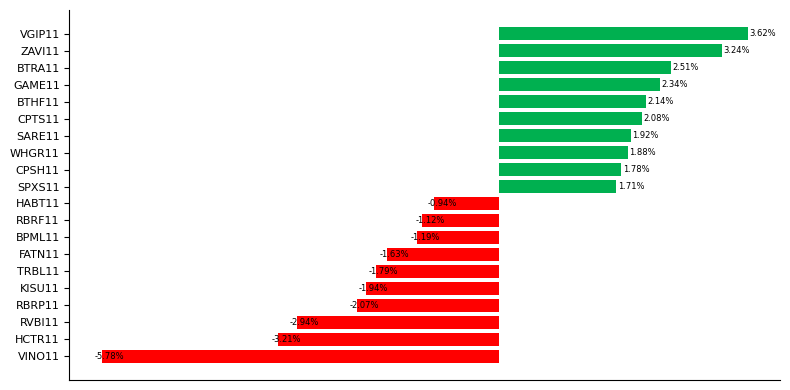

In [12]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)

top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas = top_10_altasXbaixas.sort_values(by='VARIAÇÃO_DIARIA', ascending = True)
top_10_altasXbaixas['Ticker'] = top_10_altasXbaixas['Ticker'].apply(excluir_5_dig)

fig, ax = plt.subplots(figsize=(8, 4))

# Criar as barras horizontais com cores baseadas na variação diária
graf_barras = ax.barh(
    top_10_altasXbaixas['Ticker'], 
    top_10_altasXbaixas['VARIAÇÃO_DIARIA'], 
    color=['#00B050' if var > 0 else '#FF0000' for var in top_10_altasXbaixas['VARIAÇÃO_DIARIA']]
)

# Adicionar rótulos de dados às barras
for barra in graf_barras:
    largura = barra.get_width()
    deslocamento = 0.1 if largura < 0 else 0.02
    ax.text(
        largura - deslocamento if largura < 0 else largura + deslocamento, 
        barra.get_y() + barra.get_height() / 2,
        f'{largura:,.2f}%',
        ha='left', 
        va='center', 
        fontsize=6, 
        color='black'  # Cor dos rótulos de texto
    )

# Personalizar o gráfico
ax.set_ylabel('', fontsize=12, color='black')  # Nome do eixo Y em branco
ax.get_xaxis().set_visible(False)  # Ocultar eixo X
ax.spines['top'].set_visible(False)  # Ocultar borda superior
ax.spines['right'].set_visible(False)  # Ocultar borda direita
ax.spines['bottom'].set_visible(True) # Ocultar borda inferior
ax.spines['left'].set_color('black') # Alterando cor da linha do eixo Y
ax.tick_params(axis='y', labelsize=8, color = 'black') 

# Ajustar rótulos do eixo Y para ficarem brancos
for label in ax.get_yticklabels():
    label.set_color('Black')  # Define a cor dos rótulos do eixo Y
    label.set_fontsize(8)  # Ajusta o tamanho da fonte, se necessário

# Salvar o gráfico em um arquivo PNG
fig.savefig('VARIAÇÕES_DIARIAS.png', transparent=True, dpi=400, bbox_inches='tight')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [13]:
base_dividendos = ativos_merge.copy()

base_dividendos = base_dividendos.drop(columns = ['VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço2', 'VM'])
base_dividendos['DIV Y1'] = base_dividendos['DIV Y1'].round(4)
base_dividendos['DIV Y12'] = base_dividendos['DIV Y12'].round(4)

base_dividendos['DY 1M'] = ((base_dividendos['DIV Y1']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY 3M'] = ((base_dividendos['DIV Y3']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY 6M'] = ((base_dividendos['DIV Y6']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY YTD'] = base_dividendos['DY 1M']*12
base_dividendos['DY 12M'] = ((base_dividendos['DIV Y12']/base_dividendos['Preço1'])).round(4)
base_dividendos

df_dividendos = base_dividendos.copy()
df_dividendos = df_dividendos.drop(columns=['DIV Y1', 'DIV Y3', 'DIV Y6', 'DIV Y12', 'Quantidade', '%PL', 'VARIAÇÃO_DIARIA', 'Volume'])
df_dividendos

,Ticker,TIPO,Preço1,P/VP,Peer_GARE,VARIAÇÃO,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
0,KNRI11.SA,HIB Tijolo,131.51,0.81,PEER,0.015051,0.0076,0.0228,0.0456,0.0912,0.0836
1,TVRI11.SA,HIB Tijolo,82.00,0.81,NAO PEER,-0.017022,0.0126,0.0365,0.0723,0.1512,0.1316
2,ALZR11.SA,HIB Tijolo,96.25,0.92,PEER,-0.003107,0.0084,0.0248,0.0480,0.1008,0.0869
3,GARE11.SA,XXXX,7.91,0.86,PEER,0.014103,0.0105,0.0338,0.0678,0.1260,0.1228
4,RBRP11.SA,HIB Tijolo,41.70,0.54,PEER,-0.086528,0.0098,0.0357,0.0741,0.1176,0.1434
...,...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,7.73,0.83,NAO PEER,-0.022756,0.0129,0.0388,0.0777,0.1548,0.1405
113,ARRI11.SA,Recebivel,7.46,0.87,NAO PEER,0.010840,0.0121,0.0362,0.0737,0.1452,0.1421
114,CYCR11.SA,Recebivel,7.77,0.83,NAO PEER,0.009091,0.0129,0.0373,0.0721,0.1548,0.1454
115,CLIN11.SA,Recebivel,76.01,0.79,NAO PEER,-0.006924,0.0132,0.0395,0.0774,0.1584,0.1425


In [14]:
df_setores = df_dividendos.groupby(by = 'TIPO')[['P/VP', 'DY 1M', 'DY 3M', 'DY 6M', 'DY YTD', 'DY 12M']].mean().round(4)
df_setores

,P/VP,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
TIPO,,,,,,
Desenvolvimento,0.6900,0.0143,0.0452,0.0921,0.1716,0.1768
Fof,0.7323,0.0122,0.0373,0.0720,0.1460,0.1316
HIB Tijolo,0.7050,0.0094,0.0291,0.0585,0.1128,0.1107
Lajes,0.5829,0.0098,0.1050,0.1392,0.1172,0.1995
Logistico,0.6933,0.0104,0.0309,0.0637,0.1251,0.1152
Outros Imóveis,0.9150,0.0081,0.0361,0.0689,0.0972,0.1214
Recebivel,0.7830,0.0130,0.0380,0.0745,0.1555,0.1397
Renda Urbana,0.7925,0.0104,0.0374,0.0694,0.1251,0.1235
Shopping,0.6900,0.0090,0.0315,0.0650,0.1077,0.1216


In [15]:
df_dividendos_peers = df_dividendos.query('Peer_GARE == "PEER"')

df_dividendos_peers = df_dividendos_peers.sort_values(by=['DY 12M'], ascending=False).iloc[:10, :]
df_dividendos_peers = df_dividendos_peers.drop(columns=['TIPO','Preço1', 'Peer_GARE'])
df_dividendos_peers['Ticker'] = df_dividendos_peers['Ticker'].apply(excluir_5_dig)
df_dividendos_peers

,Ticker,P/VP,VARIAÇÃO,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
4,RBRP11,0.54,-0.086528,0.0098,0.0357,0.0741,0.1176,0.1434
10,VIUR11,0.59,-0.024209,0.0128,0.0384,0.0767,0.1536,0.1406
3,GARE11,0.86,0.014103,0.0105,0.0338,0.0678,0.1260,0.1228
8,TRXF11,0.95,0.016264,0.0094,0.0439,0.0720,0.1128,0.1191
18,GGRC11,0.80,-0.011918,0.0104,0.0318,0.0637,0.1248,0.1135
15,BRCO11,0.81,0.016879,0.0091,0.0272,0.0545,0.1092,0.0999
7,HGRU11,0.90,0.004320,0.0081,0.0332,0.0565,0.0972,0.0981
12,BTLG11,0.90,0.014706,0.0093,0.0259,0.0506,0.1116,0.0911
2,ALZR11,0.92,-0.003107,0.0084,0.0248,0.0480,0.1008,0.0869
0,KNRI11,0.81,0.015051,0.0076,0.0228,0.0456,0.0912,0.0836
